In [27]:
# # MNIST Digit Classification - Présentation
# 
# Ce notebook présente les résultats finaux de mon projet de classification de chiffres manuscrits
# sur le dataset MNIST. 
# 
# **Objectif** : entraîner un modèle (MLP ou CNN) pour reconnaître les chiffres (0-9).
# 
# **Résumé** :
# - Dataset : MNIST (60k images train, 10k images test, 28×28 pixels, grayscale)
# - Modèles testés : MLP amélioré, CNN type LeNet
# - Meilleur modèle : CNN avec Dropout + BatchNorm


# --- Imports ---

In [28]:
import torch
import torchvision
import torchvision.transforms as transforms
import matplotlib.pyplot as plt
import numpy as np
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# --- Chargement du modèle ---

In [29]:
from neural_net import NeuralNet  # Adapter selon ton fichier
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

model = NeuralNet()
model.load_state_dict(torch.load("../models/model_sgd_final.pth", map_location=device))
model.to(device)
model.eval()

C:\Users\Alex\AppData\Local\Temp\ipykernel_5052\4165207468.py:5: FutureWarning: You are using `torch.load` with `weights_only=False` (the current default value), which uses the default pickle module implicitly. It is possible to construct malicious pickle data which will execute arbitrary code during unpickling (See https://github.com/pytorch/pytorch/blob/main/SECURITY.md#untrusted-models for more details). In a future release, the default value for `weights_only` will be flipped to `True`. This limits the functions that could be executed during unpickling. Arbitrary objects will no longer be allowed to be loaded via this mode unless they are explicitly allowlisted by the user via `torch.serialization.add_safe_globals`. We recommend you start setting `weights_only=True` for any use case where you don't have full control of the loaded file. Please open an issue on GitHub for any issues related to this experimental feature.
  model.load_state_dict(torch.load("../models/model_sgd_final.pt

NeuralNet(
  (conv1): Conv2d(1, 20, kernel_size=(5, 5), stride=(1, 1))
  (bn1): BatchNorm2d(20, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (pool): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (conv2): Conv2d(20, 50, kernel_size=(5, 5), stride=(1, 1))
  (bn2): BatchNorm2d(50, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (conv3): Conv2d(50, 100, kernel_size=(3, 3), stride=(1, 1), padding=(1, 1))
  (bn3): BatchNorm2d(100, eps=1e-05, momentum=0.1, affine=True, track_running_stats=True)
  (fc1): Linear(in_features=400, out_features=256, bias=True)
  (fc2): Linear(in_features=256, out_features=10, bias=True)
  (dropout): Dropout(p=0.4, inplace=False)
)

# --- Dataset test ---

In [30]:
from mnist_dataloader import MNISTDataLoader

loader = MNISTDataLoader()
loader.setup()
train_loader = loader.train_dataloader()
test_loader = loader.test_dataloader()

# --- Fonction affichage ---

In [31]:
def imshow(img, label, pred):
    plt.imshow(img.squeeze(), cmap="gray")
    plt.title(f"Label: {label} | Pred: {pred}")
    plt.axis("off")
    plt.show()


# --- Prédictions sur quelques images ---

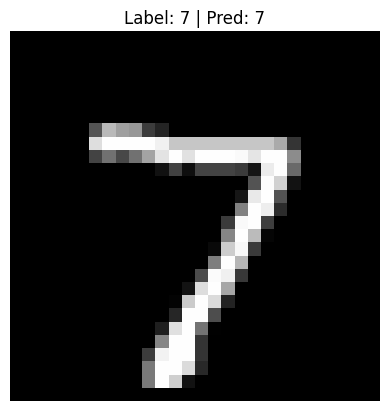

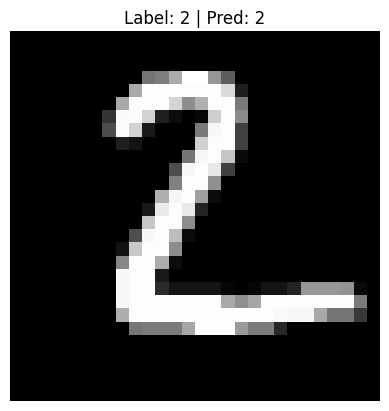

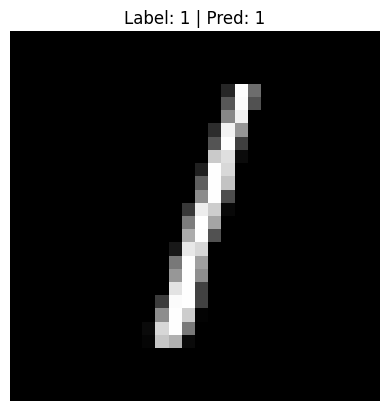

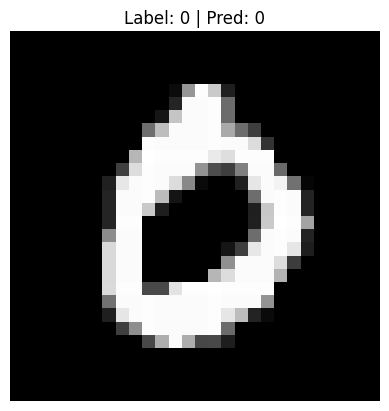

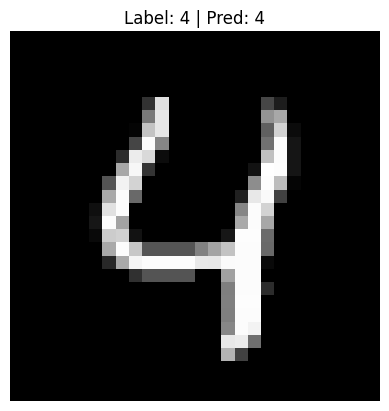

In [32]:
data_iter = iter(test_loader)
images, labels = next(data_iter)
images, labels = images.to(device), labels.to(device)

outputs = model(images)
_, preds = torch.max(outputs, 1)

for i in range(5):
    imshow(images[i].cpu(), labels[i].item(), preds[i].item())

# --- Matrice de confusion ---

In [ ]:
all_preds, all_labels = [], []
with torch.no_grad():
    for images, labels in test_loader:
        images, labels = images.to(device), labels.to(device)
        outputs = model(images)
        _, preds = torch.max(outputs, 1)
        all_preds.extend(preds.cpu().numpy())
        all_labels.extend(labels.cpu().numpy())

cm = confusion_matrix(all_labels, all_preds)
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=range(10))
disp.plot(cmap="Blues")
plt.title("Matrice de confusion - Modèle final")
plt.show()

AttributeError: 'torch.device' object has no attribute 'numpy'

# --- Résultats ---

In [ ]:
accuracy = np.mean(np.array(all_preds) == np.array(all_labels)) * 100
print(f"Accuracy finale : {accuracy:.2f}%")

print("\nChiffres les plus confondus :")
for i in range(10):
    worst_pred = np.argmax(cm[i] - np.eye(10)[i])
    if worst_pred != i:
        print(f"{i} → {worst_pred} ({cm[i][worst_pred]} fois)")

Accuracy finale : 16.78%

Chiffres les plus confondus :
0 → 8 (980 fois)
2 → 8 (1032 fois)
3 → 8 (1010 fois)
4 → 8 (977 fois)
5 → 8 (892 fois)
6 → 8 (957 fois)
7 → 8 (1028 fois)
9 → 8 (1004 fois)
